# `HystereticBackbone` Object

The `HystereticBackbone` component represents a univariate path-independent material model. This component type was introduced by Prof. Michael Scott as part of a framework that allows custom hysteretic univariate material models to be created through a combination of an *envelope* (the `HystereticBackbone` class), a *loading-unloading rule* (`UnloadingRule`), and a *strength degredation rule* (`StrengthDegredation`).

A `HystereticBackbone` object exposes the following methods:

>- `getStress(strain: float)`

Unlike most component types in OpenSees, the `HystereticBackbone` represents a *bijective* mathematical relation, free of internal variables or state.

Existing implementations of `HystereticBackbone` are described in the following sections.

In [2]:
from opensees.lib import backbone
from numpy import linspace
import matplotlib.pyplot as plt
plt.style.use("typewriter")

## Concrete models

- `Popovics` (also `Mander`)

Some unimplemented models which may be of future interest include:

- Hognestaad et al's (1955) parabolic-linear curve, notably used by Kent, Scott and Park, the `Concr_2` model of FEDEAS, and `Concrete02` model of OpenSees.

- The model of Thorenfeldt, Tomazewicz and Jensen 

In [4]:
strain = linspace(-0.005, 0.005, 100)

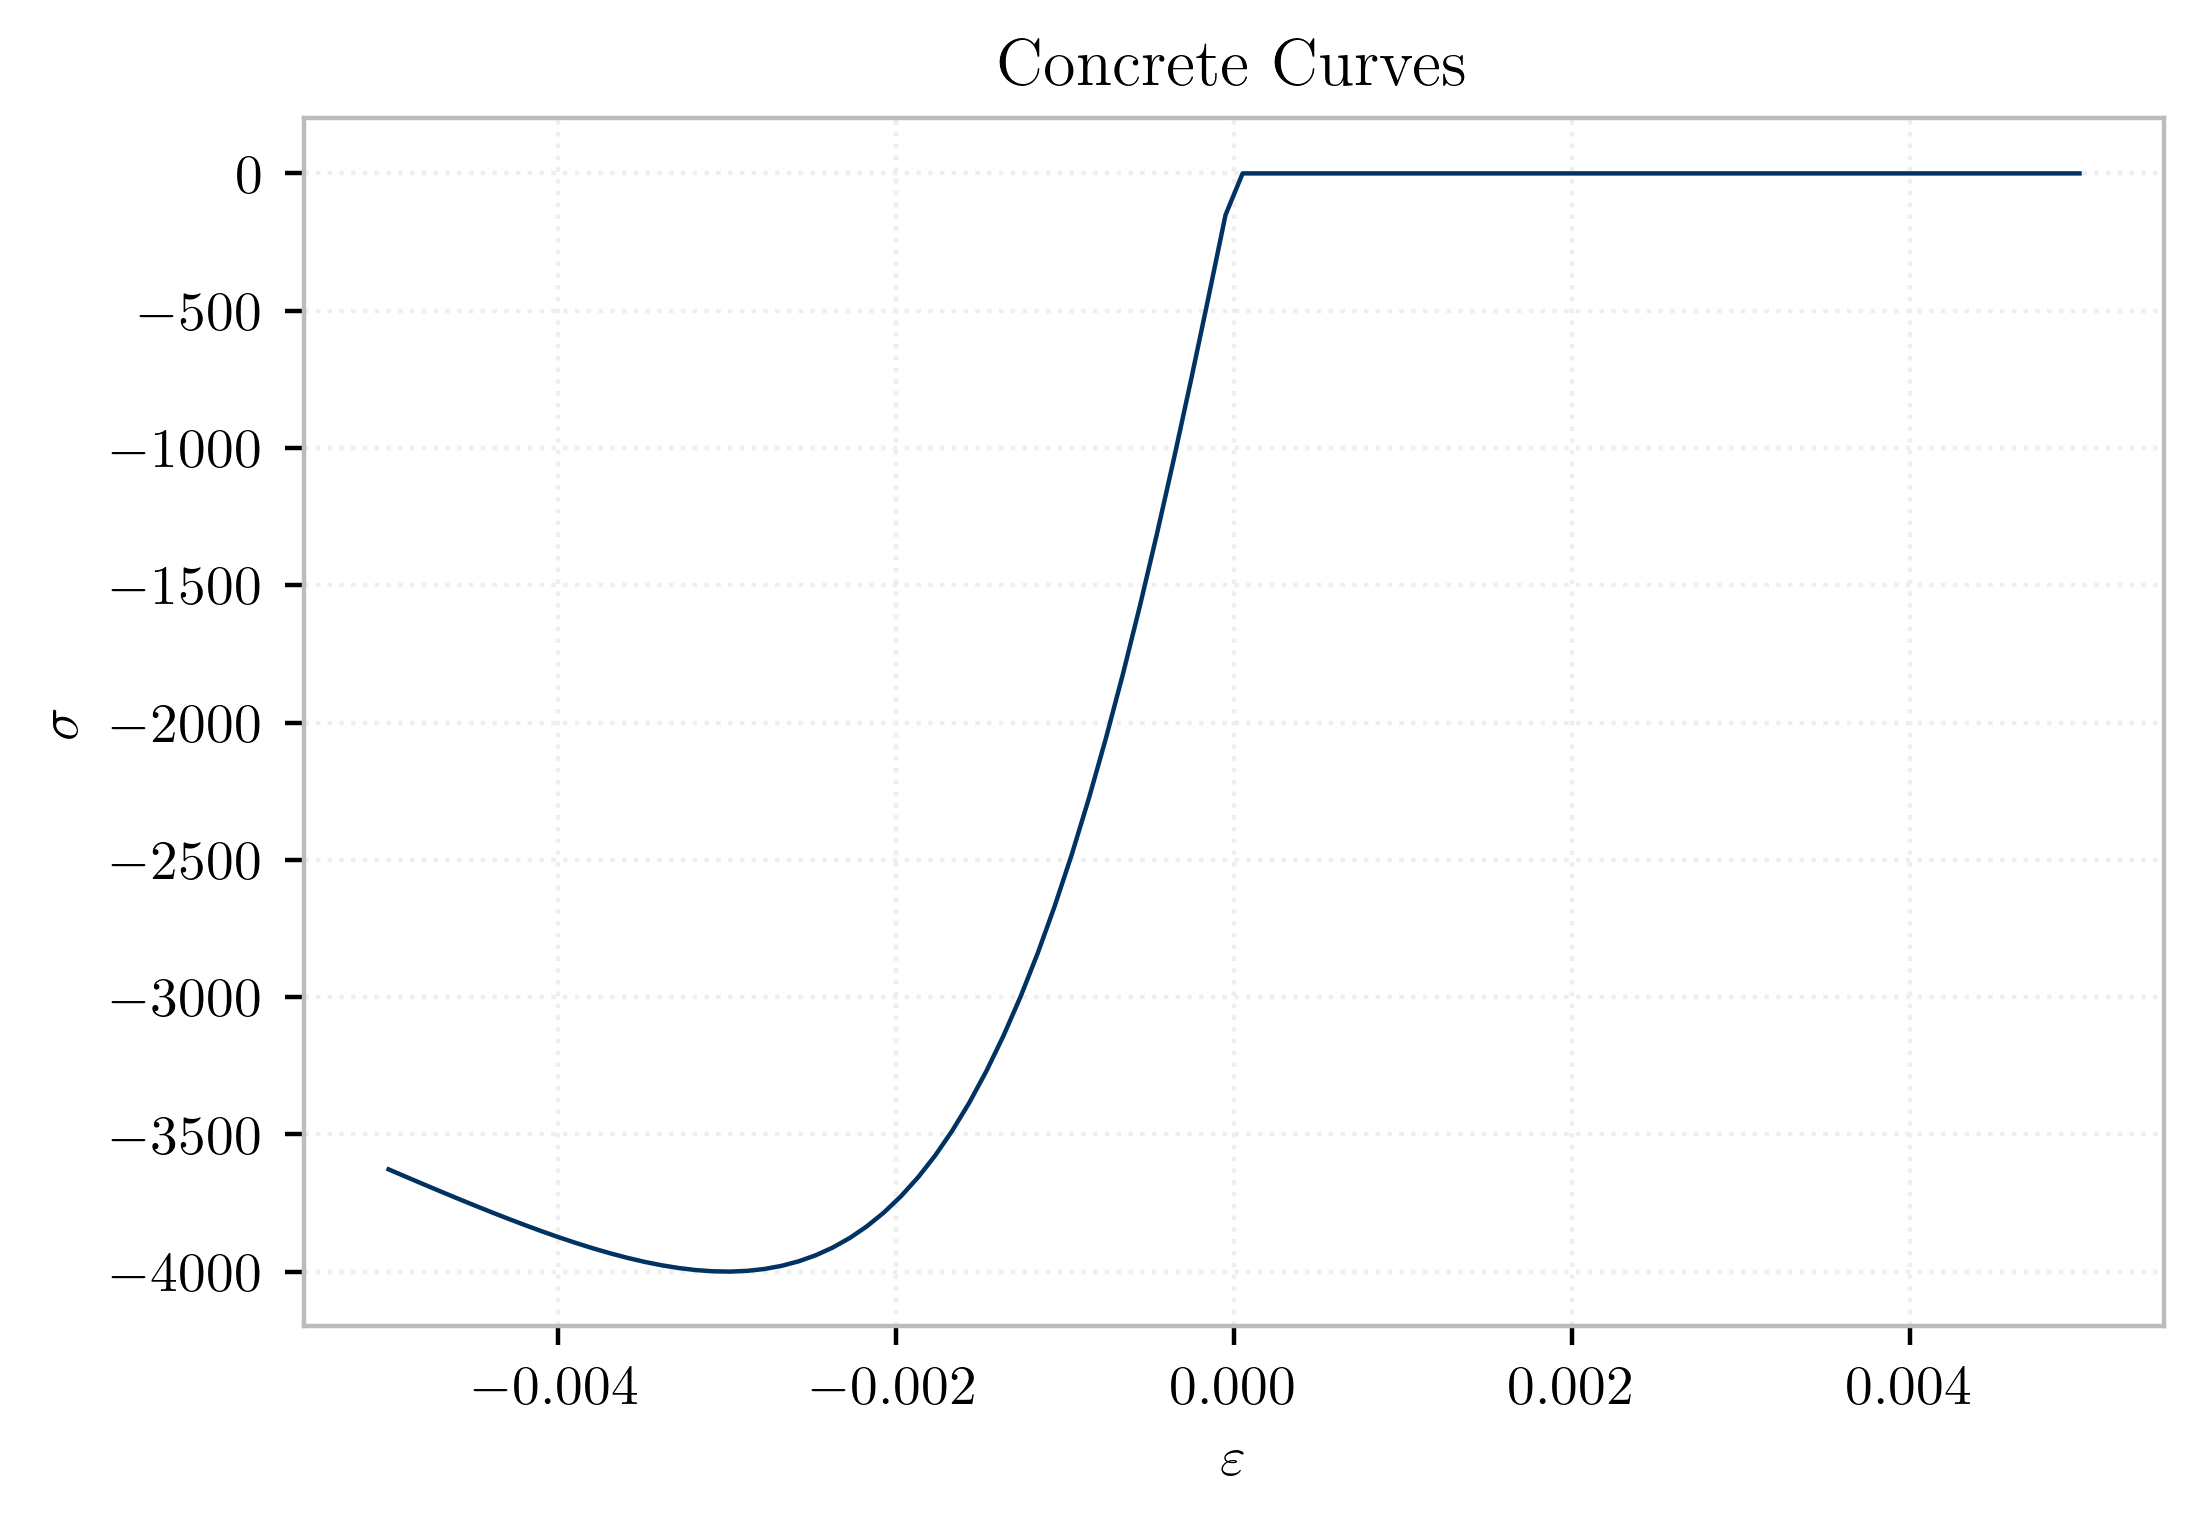

In [6]:
fc = 4e3
Ec = 3e6
epsc = 0.003
with backbone.Popovics(1, fc, epsc, Ec) as b:
    plt.plot(strain, [b.getStress(e) for e in strain])

ax = plt.gca()
ax.set_title("Concrete Curves")
ax.set_xlabel(r"$\varepsilon$")
ax.set_ylabel(r"$\sigma$");

## Steel

- `Raynor`: Raynor, D. J., Lehman, D. L., and Stanton, J. F. 2002. “Bond-slip response of reinforcing bars grouted in ducts.” ACI Struct. J., 995, 568–576.

backbone Raynor 1  29000000.0  40000.0  70000.0  0.002  0.015  3  290000.0 



Text(0, 0.5, '$\\sigma$')

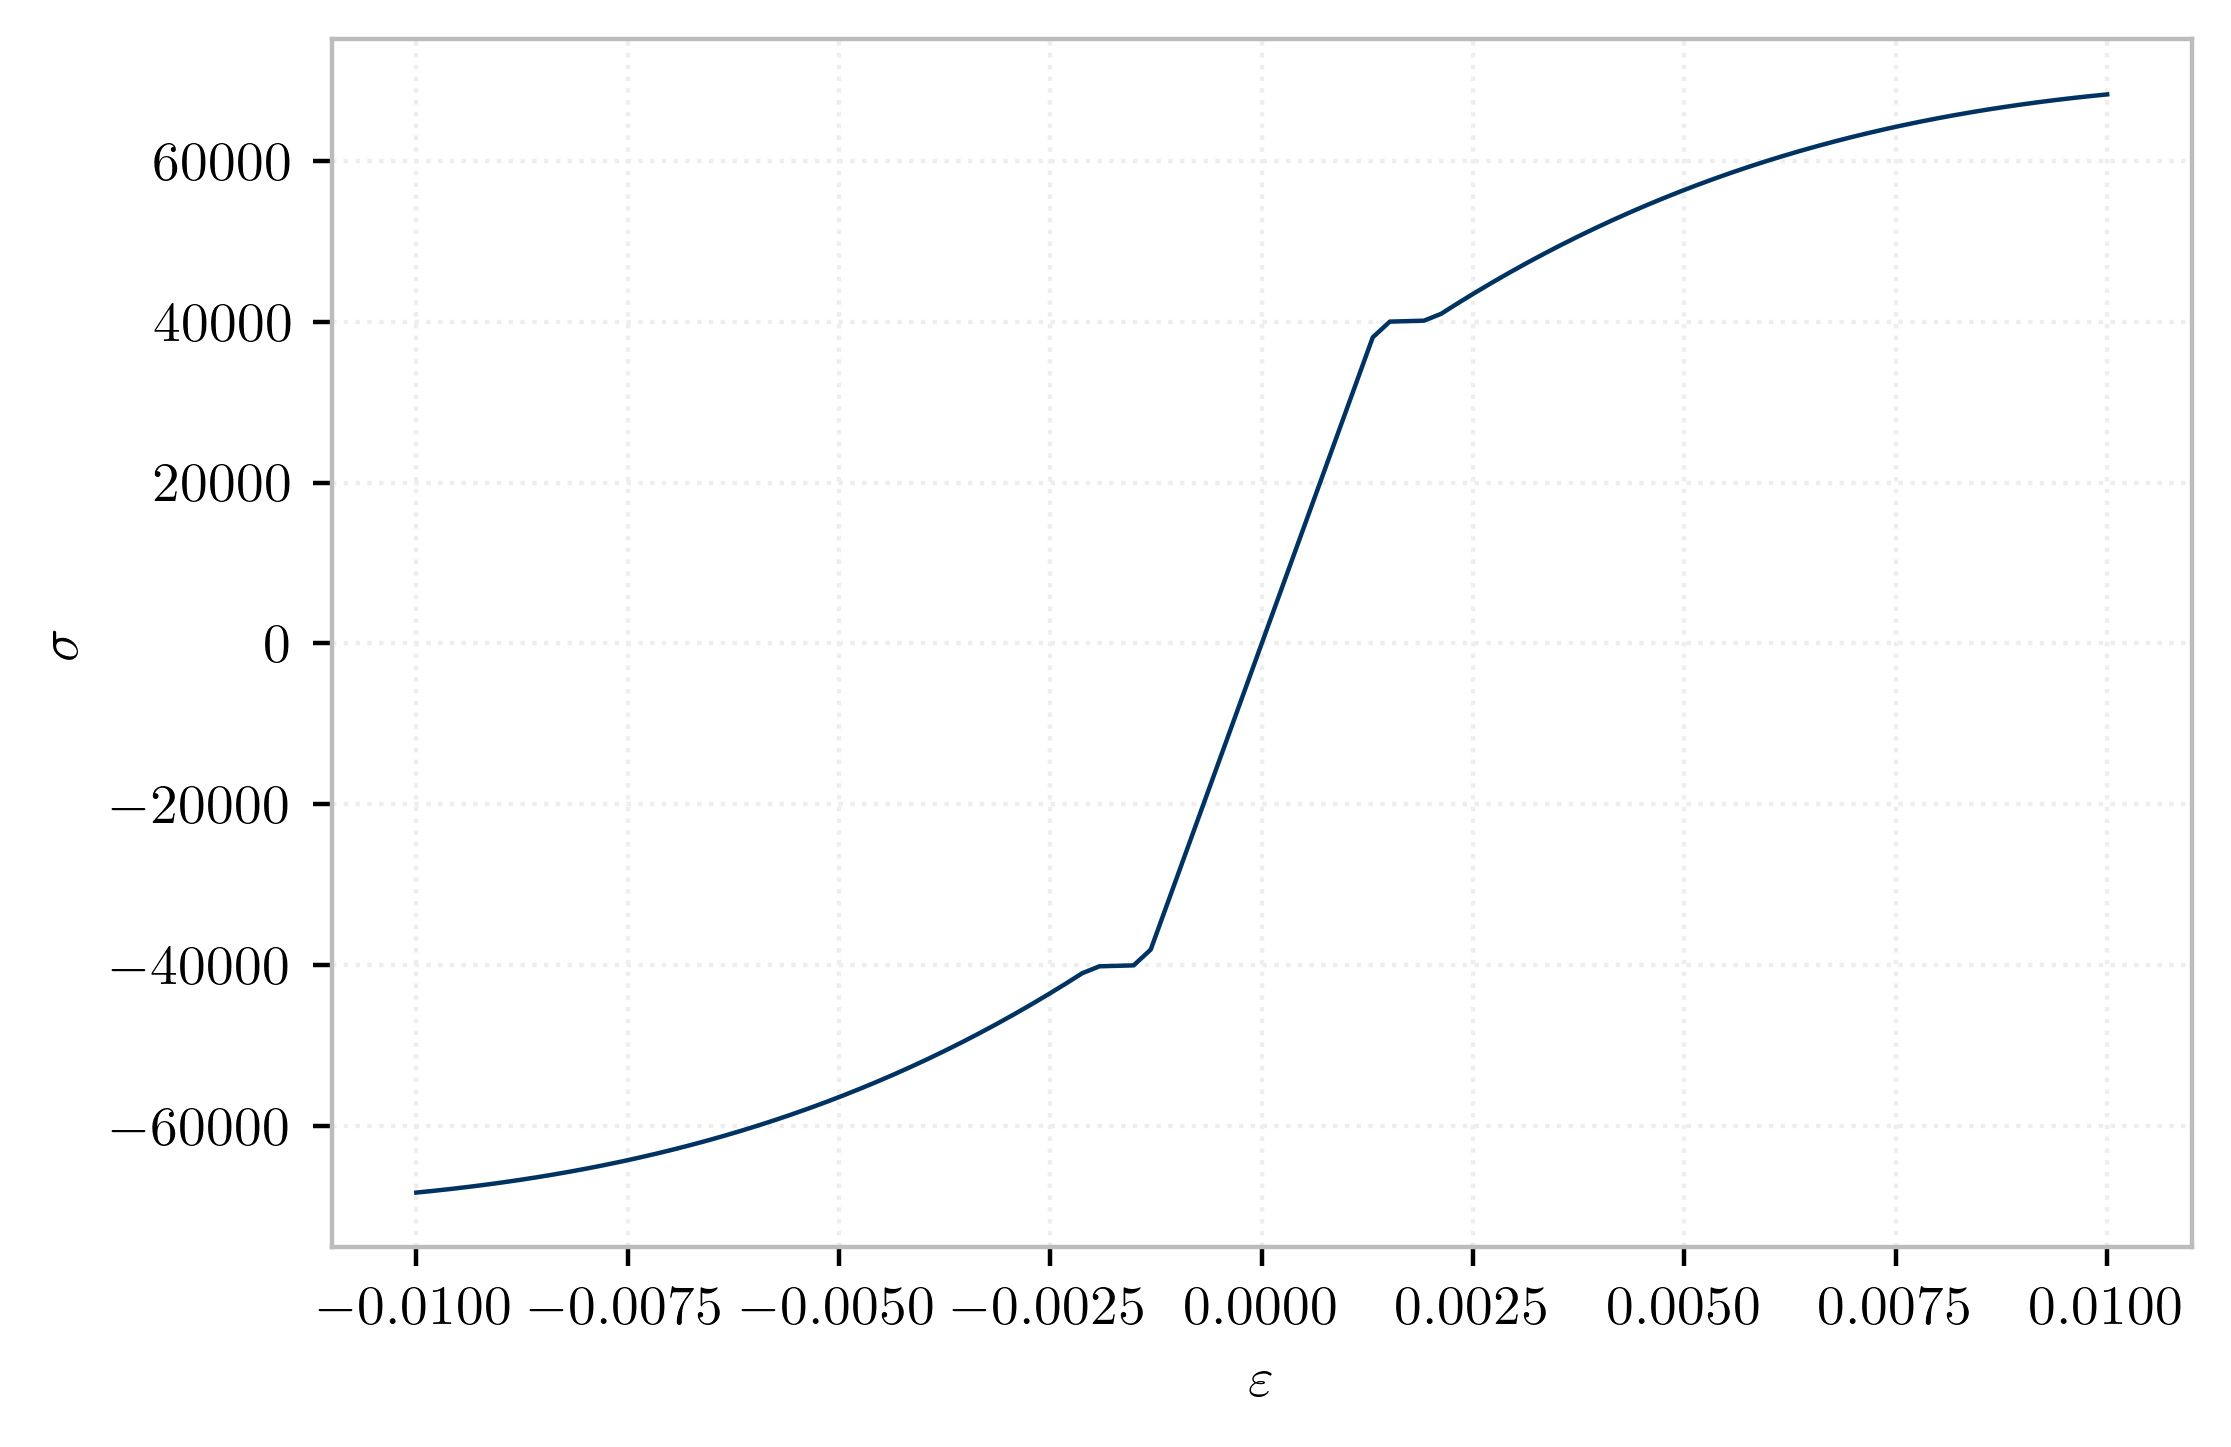

In [8]:
strain = linspace(-0.010, 0.010, 100)

with backbone.Raynor(1, 29e6, 40e3, 70e3, Epsilonsh=0.002, Epsilonsm=0.015, C1=3, Ey=0.01*29e6) as b:
    plt.plot(strain, [b.getStress(e) for e in strain])

ax = plt.gca()
ax.set_xlabel(r"$\varepsilon$")
ax.set_ylabel(r"$\sigma$");

In [10]:
# with backbone.ReeseSoftClay(None, pu,y50,n) as b:
#     pass

# with backbone.ReeseSand(None, kx,ym,pm,yu,pu) as b:
#     pass

# with backbone.ReeseStiffClayBelowWS(None, Esi, y50, As, Pc) as b:
#     pass

# with backbone.Capped(None, hystereticBackboneTag,capTag) as b:
#     pass
# with backbone.LinearCapped(None, backboneTag,eCap,E,sRes) as b:
#     pass
# with backbone.Material(None, matTag)" << endln; as b:
#     pass

# hystereticBackbone Bilinear
#   void *theBB = OPS_BilinearBackbone(rt);

# hystereticBackbone Trilinear
#   void *theBB = OPS_TrilinearBackbone(rt);

# hystereticBackbone Multilinear
#   void *theBB = OPS_MultilinearBackbone(rt);

# hystereticBackbone Arctangent
#   void *theBB = OPS_ArctangentBackbone(rt);
